### Importar las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from data_dashboard import Dashboard
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

### Leer el dataset de Galicia

In [2]:
# Dataset Galicia preprocesado FINAL, encoding='ISO-8859-1'

url = 'https://raw.githubusercontent.com/TFM123456/Big_Data_and_Data_Science_UCM/main/datos_galicia_limpio.csv'
df_galicia = pd.read_csv(url, low_memory=False, encoding='ISO-8859-1')

### EDA

In [3]:
df_galicia.head()

,Unnamed: 0,id,superficie,fecha,lat,lng,idprovincia,idmunicipio,causa,muertos,...,TMIN,TMAX,VELMEDIA,RACHA,SOL,Trimestre,Mes,Año,DIR_VIENTO,PRES_RANGE
0,1,2001150021,5.0,2001-02-20,43.703581,-8.038777,A Coruña,CEDEIRA,negligencia,0,...,7.0,15.6,2-4 m/s,16.9,10.2,Q1,febrero,2001,E,4.4
1,3,2001150094,1.5,2001-02-25,43.186836,-8.685470,A Coruña,CARBALLO,intencionado,0,...,6.5,11.6,4-6 m/s,11.1,10.2,Q1,febrero,2001,NE,4.7
2,5,2001150145,1.5,2001-04-13,43.699889,-7.984566,A Coruña,CEDEIRA,negligencia,0,...,10.4,17.4,4-6 m/s,13.9,12.1,Q2,abril,2001,NE,3.2
3,6,2001150151,1.1,2001-04-13,42.758649,-8.917814,A Coruña,LOUSAME,causa desconocida,0,...,10.4,17.4,4-6 m/s,13.9,12.1,Q2,abril,2001,NE,3.2
4,7,2001150153,1.5,2001-04-13,43.063218,-9.235604,A Coruña,MUXÃÂA,intencionado,0,...,10.4,17.4,4-6 m/s,13.9,12.1,Q2,abril,2001,NE,3.2


In [4]:
print('El dataset tiene un total de {} lineas y {} columnas'.format(df_galicia.shape[0],df_galicia.shape[1]))

El dataset tiene un total de 12976 lineas y 29 columnas


In [5]:
df_galicia.index

RangeIndex(start=0, stop=12976, step=1)

In [6]:
df_galicia.describe()

,Unnamed: 0,id,superficie,lat,lng,muertos,heridos,time_ctrl,time_ext,personal,medios,TMEDIA,PRECIPITACION,TMIN,TMAX,RACHA,SOL,Año,PRES_RANGE
count,12976.000000,1.297600e+04,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000
mean,9781.431181,2.005867e+09,2.586703,42.555421,-7.994614,0.000077,0.000462,1.781149,1.781149,12.281520,1.964396,16.584664,0.132167,9.717810,23.452366,8.537230,8.547102,2005.592555,3.836675
std,5848.203194,3.830998e+06,1.863610,0.451212,0.562395,0.008779,0.021499,0.894420,0.894420,7.252796,1.674277,5.954963,0.338685,6.252533,7.001220,3.298872,3.549735,3.828872,1.639618
min,1.000000,2.001150e+09,1.000000,41.833819,-9.293500,0.000000,0.000000,0.040000,0.040000,0.000000,0.000000,-1.300000,0.000000,-8.600000,5.600000,1.700000,0.000000,2001.000000,0.000000
25%,4839.750000,2.003150e+09,1.250000,42.189372,-8.422458,0.000000,0.000000,1.170000,1.170000,6.000000,1.000000,12.400000,0.000000,5.200000,18.600000,6.100000,6.500000,2003.000000,2.600000
50%,9402.500000,2.005151e+09,2.000000,42.470163,-7.987553,0.000000,0.000000,1.500000,1.500000,11.000000,2.000000,17.400000,0.000000,10.600000,23.400000,8.100000,9.400000,2005.000000,3.600000
75%,14958.500000,2.009150e+09,3.000000,42.932203,-7.556844,0.000000,0.000000,2.310000,2.310000,16.000000,3.000000,21.100000,0.000000,14.900000,28.400000,10.600000,11.200000,2009.000000,4.900000
max,20544.000000,2.015361e+09,10.200000,43.730713,-6.771548,1.000000,1.000000,4.190000,4.190000,33.000000,8.000000,31.200000,1.000000,23.400000,42.000000,28.300000,14.800000,2015.000000,8.600000


In [7]:
df_galicia.columns

Index(['Unnamed: 0', 'id', 'superficie', 'fecha', 'lat', 'lng', 'idprovincia',
       'idmunicipio', 'causa', 'muertos', 'heridos', 'time_ctrl', 'time_ext',
       'personal', 'medios', 'gastos', 'ALTITUD', 'TMEDIA', 'PRECIPITACION',
       'TMIN', 'TMAX', 'VELMEDIA', 'RACHA', 'SOL', 'Trimestre', 'Mes', 'Año',
       'DIR_VIENTO', 'PRES_RANGE'],
      dtype='object')

##### El tipo de datos

In [8]:
print('______________________________________________________________\n'
      '\n Tipo de datos a nivel de variable:\n'
      '______________________________________________________________\n\n\n{}'.format(df_galicia.dtypes))

______________________________________________________________

 Tipo de datos a nivel de variable:
______________________________________________________________


Unnamed: 0         int64
id                 int64
superficie       float64
fecha             object
lat              float64
lng              float64
idprovincia       object
idmunicipio       object
causa             object
muertos            int64
heridos            int64
time_ctrl        float64
time_ext         float64
personal           int64
medios             int64
gastos            object
ALTITUD           object
TMEDIA           float64
PRECIPITACION      int64
TMIN             float64
TMAX             float64
VELMEDIA          object
RACHA            float64
SOL              float64
Trimestre         object
Mes               object
Año                int64
DIR_VIENTO        object
PRES_RANGE       float64
dtype: object


##### Valores faltantes - NaN

In [9]:
# Comprobar los valores faltantes - NaN, a nivel de variable

print('______________________________________________________________\n'
      '\n Numero de observaciones con datos faltantes:\n'
      '______________________________________________________________\n\n\n{}'.format(df_galicia.isnull().sum()))

______________________________________________________________

 Numero de observaciones con datos faltantes:
______________________________________________________________


Unnamed: 0       0
id               0
superficie       0
fecha            0
lat              0
lng              0
idprovincia      0
idmunicipio      0
causa            0
muertos          0
heridos          0
time_ctrl        0
time_ext         0
personal         0
medios           0
gastos           0
ALTITUD          0
TMEDIA           0
PRECIPITACION    0
TMIN             0
TMAX             0
VELMEDIA         0
RACHA            0
SOL              0
Trimestre        0
Mes              0
Año              0
DIR_VIENTO       0
PRES_RANGE       0
dtype: int64


In [10]:
# Comprobar los porcentajes de observaciones con valores faltantes - NaN, a nivel de variable

print('______________________________________________________________\n'
      '\n El porcentaje de datos faltantes a nivel de variable:\n'
      '______________________________________________________________\n\n\n{}'.format(df_galicia.isnull().mean()*100))

______________________________________________________________

 El porcentaje de datos faltantes a nivel de variable:
______________________________________________________________


Unnamed: 0       0.0
id               0.0
superficie       0.0
fecha            0.0
lat              0.0
lng              0.0
idprovincia      0.0
idmunicipio      0.0
causa            0.0
muertos          0.0
heridos          0.0
time_ctrl        0.0
time_ext         0.0
personal         0.0
medios           0.0
gastos           0.0
ALTITUD          0.0
TMEDIA           0.0
PRECIPITACION    0.0
TMIN             0.0
TMAX             0.0
VELMEDIA         0.0
RACHA            0.0
SOL              0.0
Trimestre        0.0
Mes              0.0
Año              0.0
DIR_VIENTO       0.0
PRES_RANGE       0.0
dtype: float64


##### Comprobar los valores únicos a nivel de variable

In [11]:
# Comprobar la dimensión y los valores únicos de cada variable

print('______________________________________________________________\n'
      '\n\t Número de observaciones únicos \n'
      '______________________________________________________________\n')
      
print('Dataset Galicia: ', df_galicia.shape)

df = pd.DataFrame(columns = ['Variable','Valores_unicos'])

for i in df_galicia.columns.values:
    df = df.append({'Variable':i, 'Valores_unicos':(len(df_galicia[i].unique()))}, ignore_index = True)

df

______________________________________________________________

	 Número de observaciones únicos 
______________________________________________________________

Dataset Galicia:  (12976, 29)


,Variable,Valores_unicos
0,Unnamed: 0,12976
1,id,12976
2,superficie,619
3,fecha,2272
4,lat,6118
5,lng,6121
6,idprovincia,4
7,idmunicipio,268
8,causa,5
9,muertos,2


Se observa que las variables **Unnamed:0** e **ID** tienen un total de 12.976 valores únicos, lo que coincide con el número total de observaciones presentes en el dataset de análisis. Dado que las variable solo presentan valore únicos, se decide eliminar ambas variables.

In [12]:
# Eliminar la columna Unnamed:0 e ID

df_galicia.drop(['Unnamed: 0'], axis=1, inplace=True)
df_galicia.drop(['id'], axis=1, inplace=True)

In [13]:
df_galicia.columns

Index(['superficie', 'fecha', 'lat', 'lng', 'idprovincia', 'idmunicipio',
       'causa', 'muertos', 'heridos', 'time_ctrl', 'time_ext', 'personal',
       'medios', 'gastos', 'ALTITUD', 'TMEDIA', 'PRECIPITACION', 'TMIN',
       'TMAX', 'VELMEDIA', 'RACHA', 'SOL', 'Trimestre', 'Mes', 'Año',
       'DIR_VIENTO', 'PRES_RANGE'],
      dtype='object')

In [14]:
df_galicia.shape   # Después de eliminar Unnamed:0 y ID

(12976, 27)

<AxesSubplot:xlabel='idprovincia', ylabel='superficie'>

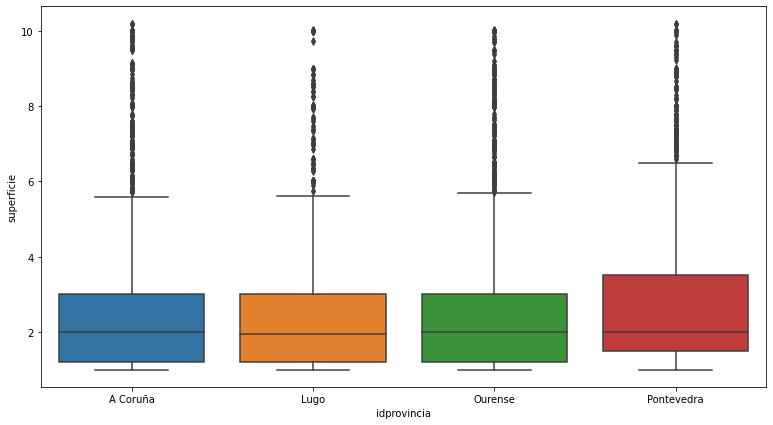

In [15]:
plt.figure(figsize=(13,7))
sns.boxplot(x='idprovincia', y ='superficie', data= df_galicia)

In [16]:
'''z = np.abs(stats.zscore(df_galicia['superficie']))
threshold = 3
print(np.where(z>3))'''

"z = np.abs(stats.zscore(df_galicia['superficie']))\nthreshold = 3\nprint(np.where(z>3))"

<AxesSubplot:xlabel='idprovincia', ylabel='muertos'>

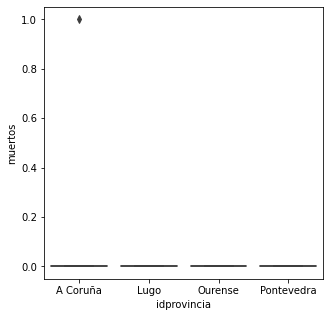

In [17]:
plt.figure(figsize=(5,5))
sns.boxplot(x='idprovincia', y ='muertos', data= df_galicia)

<AxesSubplot:xlabel='idprovincia', ylabel='heridos'>

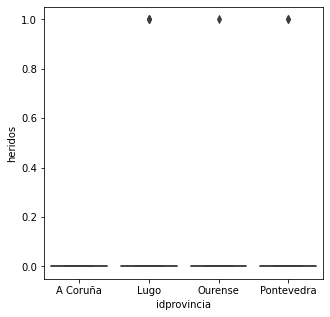

In [18]:
plt.figure(figsize=(5,5))
sns.boxplot(x='idprovincia', y ='heridos', data= df_galicia)

### Análisis tipo de variables

In [19]:
df_galicia.dtypes

superficie       float64
fecha             object
lat              float64
lng              float64
idprovincia       object
idmunicipio       object
causa             object
muertos            int64
heridos            int64
time_ctrl        float64
time_ext         float64
personal           int64
medios             int64
gastos            object
ALTITUD           object
TMEDIA           float64
PRECIPITACION      int64
TMIN             float64
TMAX             float64
VELMEDIA          object
RACHA            float64
SOL              float64
Trimestre         object
Mes               object
Año                int64
DIR_VIENTO        object
PRES_RANGE       float64
dtype: object

In [20]:
var_numericas = df_galicia._get_numeric_data()
var_categoricas = df_galicia.select_dtypes(include = ["object"])

In [21]:
var_numericas.shape

(12976, 17)

In [22]:
var_categoricas.shape

(12976, 10)

#### Análisis de las variables  numéricas

In [23]:
var_numericas.columns

Index(['superficie', 'lat', 'lng', 'muertos', 'heridos', 'time_ctrl',
       'time_ext', 'personal', 'medios', 'TMEDIA', 'PRECIPITACION', 'TMIN',
       'TMAX', 'RACHA', 'SOL', 'Año', 'PRES_RANGE'],
      dtype='object')

In [24]:
df_galicia['superficie'].value_counts()

1.00    2235
2.00    1422
1.50    1375
3.00     802
2.50     637
        ... 
4.78       1
8.98       1
7.27       1
4.92       1
6.92       1
Name: superficie, Length: 619, dtype: int64

In [25]:
df_galicia['lat'].value_counts()

42.304143    83
41.894282    49
42.234061    49
42.286446    43
42.440690    42
             ..
42.921323     1
42.380672     1
42.752587     1
43.169059     1
41.918729     1
Name: lat, Length: 6118, dtype: int64

In [26]:
df_galicia['lng'].value_counts()

-8.241844    83
-7.945682    49
-7.430299    49
-7.204859    43
-8.014276    42
             ..
-8.359326     1
-7.975117     1
-8.599767     1
-7.335524     1
-7.643030     1
Name: lng, Length: 6121, dtype: int64

In [27]:
df_galicia['muertos'].value_counts()

0    12975
1        1
Name: muertos, dtype: int64

In [28]:
df_galicia['heridos'].value_counts()

0    12970
1        6
Name: heridos, dtype: int64

In [29]:
df_galicia['time_ctrl'].value_counts()

1.30    434
1.10    409
1.40    397
1.20    393
1.45    386
       ... 
0.21      1
0.17      1
0.16      1
0.06      1
0.04      1
Name: time_ctrl, Length: 251, dtype: int64

In [30]:
df_galicia['time_ext'].value_counts()

1.30    434
1.10    409
1.40    397
1.20    393
1.45    386
       ... 
0.21      1
0.17      1
0.16      1
0.06      1
0.04      1
Name: time_ext, Length: 251, dtype: int64

In [31]:
df_galicia['personal'].value_counts()

6     1680
5     1232
11    1117
16     670
10     652
9      613
7      570
12     558
13     517
8      458
4      416
17     413
15     394
14     379
21     329
18     322
22     262
19     255
20     225
1      202
23     187
26     181
3      179
24     176
25     152
27     147
31     116
28     113
2      112
32      99
29      90
30      85
33      68
0        7
Name: personal, dtype: int64

In [32]:
df_galicia['medios'].value_counts()

1    4287
2    2987
0    2034
3    1644
4     888
5     507
6     302
7     218
8     109
Name: medios, dtype: int64

In [33]:
df_galicia['TMEDIA'].value_counts()

18.4    176
21.2    134
20.2    131
21.8    125
20.4    124
       ... 
1.5       1
27.3      1
1.3       1
3.5       1
2.7       1
Name: TMEDIA, Length: 287, dtype: int64

In [34]:
df_galicia['PRECIPITACION'].value_counts()

0    11261
1     1715
Name: PRECIPITACION, dtype: int64

In [35]:
df_galicia['TMIN'].value_counts()

 17.0    202
 14.4    196
 15.4    186
 16.0    185
 15.0    182
        ... 
-7.3       1
-4.0       1
-7.0       1
 17.9      1
-5.3       1
Name: TMIN, Length: 276, dtype: int64

In [36]:
df_galicia['TMAX'].value_counts()

22.0    179
27.0    155
25.0    155
24.0    141
20.0    139
       ... 
38.3      1
11.1      1
7.1       1
9.3       1
32.7      1
Name: TMAX, Length: 333, dtype: int64

In [37]:
df_galicia['RACHA'].value_counts()

6.7     576
7.5     550
6.4     532
7.8     503
8.6     500
       ... 
1.9       1
22.8      1
23.6      1
28.3      1
20.6      1
Name: RACHA, Length: 73, dtype: int64

In [38]:
df_galicia['SOL'].value_counts()

0.0     415
10.0    276
10.1    229
9.1     214
10.5    207
       ... 
14.4     10
14.2      8
14.5      8
14.6      6
14.8      4
Name: SOL, Length: 149, dtype: int64

In [39]:
df_galicia['Año'].value_counts()

2004    1758
2002    1755
2005    1754
2001    1478
2003    1382
2006    1004
2011     918
2009     604
2012     581
2010     469
2013     352
2015     283
2008     272
2007     244
2014     122
Name: Año, dtype: int64

In [40]:
df_galicia['PRES_RANGE'].value_counts()

3.6    391
4.0    347
3.0    319
2.0    294
2.4    292
      ... 
8.6      2
0.5      1
7.5      1
7.1      1
2.5      1
Name: PRES_RANGE, Length: 149, dtype: int64

In [41]:
df_galicia.columns

Index(['superficie', 'fecha', 'lat', 'lng', 'idprovincia', 'idmunicipio',
       'causa', 'muertos', 'heridos', 'time_ctrl', 'time_ext', 'personal',
       'medios', 'gastos', 'ALTITUD', 'TMEDIA', 'PRECIPITACION', 'TMIN',
       'TMAX', 'VELMEDIA', 'RACHA', 'SOL', 'Trimestre', 'Mes', 'Año',
       'DIR_VIENTO', 'PRES_RANGE'],
      dtype='object')

In [42]:
df_galicia.shape

(12976, 27)

#### Análisis de las variables no numéricas / categóricas

In [43]:
var_categoricas.columns

Index(['fecha', 'idprovincia', 'idmunicipio', 'causa', 'gastos', 'ALTITUD',
       'VELMEDIA', 'Trimestre', 'Mes', 'DIR_VIENTO'],
      dtype='object')

In [44]:
df_galicia['idprovincia'].value_counts()

Ourense       5762
A Coruña      3549
Pontevedra    2062
Lugo          1603
Name: idprovincia, dtype: int64

In [45]:
len(df_galicia['idprovincia'].unique())

4

In [46]:
df_galicia['idmunicipio'].value_counts()

VIANA DO BOLO          436
MANZANEDA              352
CHANDREXA DE QUEIXA    295
MUIÃâOS             256
SANTA COMBA            234
                      ... 
RIBADUMIA                1
LOURENZÃÂ              1
CARIÃâO               1
BEADE                    1
MUGARDOS                 1
Name: idmunicipio, Length: 268, dtype: int64

In [47]:
len(df_galicia['idmunicipio'].unique())

268

Debido al número elevado de categorías, se opta por eliminar la variable.

In [48]:
df_galicia.drop(['idmunicipio'], axis = 1, inplace=True)

In [49]:
df_galicia['causa'].value_counts()

intencionado         11293
causa desconocida      830
negligencia            534
fuego reproducido      215
rayo                   104
Name: causa, dtype: int64

In [50]:
df_galicia['gastos'].value_counts()

NO INFO    10779
< 5K        1769
>5K          428
Name: gastos, dtype: int64

In [51]:
len(df_galicia['gastos'].unique())

3

In [52]:
df_galicia['ALTITUD'].value_counts()

Superior a 125    5762
Inferior a 80     3549
Entre 80-125      2062
NO INFO           1603
Name: ALTITUD, dtype: int64

In [53]:
len(df_galicia['ALTITUD'].unique())

4

In [54]:
df_galicia['VELMEDIA'].value_counts()

< 2 m/s    7366
2-4 m/s    3926
4-6 m/s    1125
6-8 m/s     385
> 8 m/s     174
Name: VELMEDIA, dtype: int64

In [55]:
len(df_galicia['VELMEDIA'].unique())

5

In [56]:
df_galicia['Trimestre'].value_counts()

Q3    5256
Q1    3554
Q2    2825
Q4    1341
Name: Trimestre, dtype: int64

In [57]:
len(df_galicia['Trimestre'].unique())

4

In [58]:
df_galicia['Mes'].value_counts()

agosto        2296
marzo         2070
septiembre    1929
abril         1358
febrero       1309
julio         1031
junio          864
octubre        655
mayo           603
diciembre      448
noviembre      238
enero          175
Name: Mes, dtype: int64

In [59]:
len(df_galicia['Mes'].unique())

12

In [60]:
df_galicia['DIR_VIENTO'].value_counts()

NE    2727
N     2722
W     2395
NW    1843
E     1353
S      767
SW     691
SE     478
Name: DIR_VIENTO, dtype: int64

In [61]:
len(df_galicia['DIR_VIENTO'].unique())

8

In [62]:
df_galicia.shape  # Después de eliminar la variable IDMUNICIPIO

(12976, 26)

In [63]:
df_galicia.columns

Index(['superficie', 'fecha', 'lat', 'lng', 'idprovincia', 'causa', 'muertos',
       'heridos', 'time_ctrl', 'time_ext', 'personal', 'medios', 'gastos',
       'ALTITUD', 'TMEDIA', 'PRECIPITACION', 'TMIN', 'TMAX', 'VELMEDIA',
       'RACHA', 'SOL', 'Trimestre', 'Mes', 'Año', 'DIR_VIENTO', 'PRES_RANGE'],
      dtype='object')

Se opta por pasar las variables categorícas a variables dummies, creando tantas variables dummies cuantas categorías presenta cada variable - 1. En este paso se añaden al dataset todas las variables dummies (para todas las categorías), y en un paso posterior se eliminará la variable dummy que menos importancia presenta en la relación con la variable objetivo, para cada una de las variables categóricas.

#### Transformar las variables categóricas no binarias a dummies

In [64]:
lista_categoricas = df_galicia.select_dtypes(include = ["object"]).copy()
lista_categoricas.columns

Index(['fecha', 'idprovincia', 'causa', 'gastos', 'ALTITUD', 'VELMEDIA',
       'Trimestre', 'Mes', 'DIR_VIENTO'],
      dtype='object')

Guardamos la variable target **causa** en una variable nueva y la eliminamos del dataset inicial.

In [65]:
lista_categoricas.drop(['causa'], axis=1, inplace=True)
lista_categoricas.drop(['fecha'], axis=1, inplace=True)
lista_categoricas.columns

Index(['idprovincia', 'gastos', 'ALTITUD', 'VELMEDIA', 'Trimestre', 'Mes',
       'DIR_VIENTO'],
      dtype='object')

In [66]:
target_cat = df_galicia['causa'].copy()

In [67]:
target_cat.head()

0          negligencia
1         intencionado
2          negligencia
3    causa desconocida
4         intencionado
Name: causa, dtype: object

In [68]:
target_cat.index

RangeIndex(start=0, stop=12976, step=1)

In [69]:
lista_categoricas.columns

Index(['idprovincia', 'gastos', 'ALTITUD', 'VELMEDIA', 'Trimestre', 'Mes',
       'DIR_VIENTO'],
      dtype='object')

In [70]:
df_galicia.drop(['fecha'], axis=1, inplace=True)

In [71]:
df_galicia.columns

Index(['superficie', 'lat', 'lng', 'idprovincia', 'causa', 'muertos',
       'heridos', 'time_ctrl', 'time_ext', 'personal', 'medios', 'gastos',
       'ALTITUD', 'TMEDIA', 'PRECIPITACION', 'TMIN', 'TMAX', 'VELMEDIA',
       'RACHA', 'SOL', 'Trimestre', 'Mes', 'Año', 'DIR_VIENTO', 'PRES_RANGE'],
      dtype='object')

In [72]:
type(lista_categoricas)

pandas.core.frame.DataFrame

In [73]:
df_galicia.shape   # Después de eliminar la FECHA

(12976, 25)

In [74]:
lista_categoricas.columns

Index(['idprovincia', 'gastos', 'ALTITUD', 'VELMEDIA', 'Trimestre', 'Mes',
       'DIR_VIENTO'],
      dtype='object')

In [75]:
for k in lista_categoricas:
    dummies = pd.get_dummies(df_galicia[k], prefix=k)
    df_galicia = df_galicia.drop(k, 1)
    df_galicia = pd.concat([df_galicia, dummies], axis=1)

In [76]:
df_galicia.head()

,superficie,lat,lng,causa,muertos,heridos,time_ctrl,time_ext,personal,medios,...,Mes_octubre,Mes_septiembre,DIR_VIENTO_E,DIR_VIENTO_N,DIR_VIENTO_NE,DIR_VIENTO_NW,DIR_VIENTO_S,DIR_VIENTO_SE,DIR_VIENTO_SW,DIR_VIENTO_W
0,5.0,43.703581,-8.038777,negligencia,0,0,3.55,3.55,14,2,...,0,0,1,0,0,0,0,0,0,0
1,1.5,43.186836,-8.685470,intencionado,0,0,2.05,2.05,5,0,...,0,0,0,0,1,0,0,0,0,0
2,1.5,43.699889,-7.984566,negligencia,0,0,1.50,1.50,9,1,...,0,0,0,0,1,0,0,0,0,0
3,1.1,42.758649,-8.917814,causa desconocida,0,0,3.10,3.10,18,2,...,0,0,0,0,1,0,0,0,0,0
4,1.5,43.063218,-9.235604,intencionado,0,0,1.35,1.35,14,1,...,0,0,0,0,1,0,0,0,0,0


In [77]:
df_galicia.shape  # Después de crear las dummies - un total de 40 ??? dummies,y después de eliminar las 7 variables originales

(12976, 58)

In [78]:
df_galicia.columns

Index(['superficie', 'lat', 'lng', 'causa', 'muertos', 'heridos', 'time_ctrl',
       'time_ext', 'personal', 'medios', 'TMEDIA', 'PRECIPITACION', 'TMIN',
       'TMAX', 'RACHA', 'SOL', 'Año', 'PRES_RANGE', 'idprovincia_A Coruña',
       'idprovincia_Lugo', 'idprovincia_Ourense', 'idprovincia_Pontevedra',
       'gastos_< 5K ', 'gastos_>5K', 'gastos_NO INFO', 'ALTITUD_Entre 80-125',
       'ALTITUD_Inferior a 80', 'ALTITUD_NO INFO', 'ALTITUD_Superior a 125',
       'VELMEDIA_2-4 m/s', 'VELMEDIA_4-6 m/s', 'VELMEDIA_6-8 m/s',
       'VELMEDIA_< 2 m/s', 'VELMEDIA_> 8 m/s', 'Trimestre_Q1', 'Trimestre_Q2',
       'Trimestre_Q3', 'Trimestre_Q4', 'Mes_abril', 'Mes_agosto',
       'Mes_diciembre', 'Mes_enero', 'Mes_febrero', 'Mes_julio', 'Mes_junio',
       'Mes_marzo', 'Mes_mayo', 'Mes_noviembre', 'Mes_octubre',
       'Mes_septiembre', 'DIR_VIENTO_E', 'DIR_VIENTO_N', 'DIR_VIENTO_NE',
       'DIR_VIENTO_NW', 'DIR_VIENTO_S', 'DIR_VIENTO_SE', 'DIR_VIENTO_SW',
       'DIR_VIENTO_W'],
      dtype

### Análisis de multicolinealidad

Antes de realizar el muestreo de datos, se calcula el valor VIF para todas las variables para evitar situaciones de multicolinealidad.

Comprobamos que todas las variables son numéricas.

In [79]:
df_galicia.dtypes

superficie                float64
lat                       float64
lng                       float64
causa                      object
muertos                     int64
heridos                     int64
time_ctrl                 float64
time_ext                  float64
personal                    int64
medios                      int64
TMEDIA                    float64
PRECIPITACION               int64
TMIN                      float64
TMAX                      float64
RACHA                     float64
SOL                       float64
Año                         int64
PRES_RANGE                float64
idprovincia_A Coruña        uint8
idprovincia_Lugo            uint8
idprovincia_Ourense         uint8
idprovincia_Pontevedra      uint8
gastos_< 5K                 uint8
gastos_>5K                  uint8
gastos_NO INFO              uint8
ALTITUD_Entre 80-125        uint8
ALTITUD_Inferior a 80       uint8
ALTITUD_NO INFO             uint8
ALTITUD_Superior a 125      uint8
VELMEDIA_2-4 m

In [80]:
# Calcular el VIF de las variables

df_total_vif = df_galicia.copy(deep = True)
features = list(df_total_vif.columns)
features.remove('causa')  # sin incluir la variable target

df_total_vif = df_total_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = df_total_vif[fet]
    y = df_galicia[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('El valor del VIF para la variable', var, 'es:', vif)

El valor del VIF para la variable superficie es: 1.313893157175205
El valor del VIF para la variable lat es: 4.410968940789858
El valor del VIF para la variable lng es: 2.861319245764335
El valor del VIF para la variable muertos es: 1.003362961822251
El valor del VIF para la variable heridos es: 1.0056417622391587
El valor del VIF para la variable time_ctrl es: inf
El valor del VIF para la variable time_ext es: inf
El valor del VIF para la variable personal es: 2.0364178748460144


<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))


El valor del VIF para la variable medios es: 2.045451679693736
El valor del VIF para la variable TMEDIA es: 52571.914695647705
El valor del VIF para la variable PRECIPITACION es: 1.311021665553467
El valor del VIF para la variable TMIN es: 14495.05661806808
El valor del VIF para la variable TMAX es: 18184.077959872873
El valor del VIF para la variable RACHA es: 2.886674665462221
El valor del VIF para la variable SOL es: 2.1138960656487025
El valor del VIF para la variable Año es: 1.1681523901747302
El valor del VIF para la variable PRES_RANGE es: 1.3218908959634919


<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero en

El valor del VIF para la variable idprovincia_A Coruña es: inf
El valor del VIF para la variable idprovincia_Lugo es: inf
El valor del VIF para la variable idprovincia_Ourense es: inf
El valor del VIF para la variable idprovincia_Pontevedra es: inf
El valor del VIF para la variable gastos_< 5K  es: inf
El valor del VIF para la variable gastos_>5K es: inf
El valor del VIF para la variable gastos_NO INFO es: inf
El valor del VIF para la variable ALTITUD_Entre 80-125 es: inf
El valor del VIF para la variable ALTITUD_Inferior a 80 es: inf


<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero en

El valor del VIF para la variable ALTITUD_NO INFO es: inf
El valor del VIF para la variable ALTITUD_Superior a 125 es: inf
El valor del VIF para la variable VELMEDIA_2-4 m/s es: inf
El valor del VIF para la variable VELMEDIA_4-6 m/s es: inf
El valor del VIF para la variable VELMEDIA_6-8 m/s es: inf
El valor del VIF para la variable VELMEDIA_< 2 m/s es: inf
El valor del VIF para la variable VELMEDIA_> 8 m/s es: inf
El valor del VIF para la variable Trimestre_Q1 es: inf
El valor del VIF para la variable Trimestre_Q2 es: inf


<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero en

El valor del VIF para la variable Trimestre_Q3 es: inf
El valor del VIF para la variable Trimestre_Q4 es: inf
El valor del VIF para la variable Mes_abril es: inf
El valor del VIF para la variable Mes_agosto es: inf
El valor del VIF para la variable Mes_diciembre es: inf
El valor del VIF para la variable Mes_enero es: inf
El valor del VIF para la variable Mes_febrero es: inf
El valor del VIF para la variable Mes_julio es: inf
El valor del VIF para la variable Mes_junio es: inf
El valor del VIF para la variable Mes_marzo es: inf
El valor del VIF para la variable Mes_mayo es: inf
El valor del VIF para la variable Mes_noviembre es: inf
El valor del VIF para la variable Mes_octubre es: inf
El valor del VIF para la variable Mes_septiembre es: inf
El valor del VIF para la variable DIR_VIENTO_E es: inf


<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero en

El valor del VIF para la variable DIR_VIENTO_N es: inf
El valor del VIF para la variable DIR_VIENTO_NE es: inf
El valor del VIF para la variable DIR_VIENTO_NW es: inf
El valor del VIF para la variable DIR_VIENTO_S es: inf
El valor del VIF para la variable DIR_VIENTO_SE es: inf
El valor del VIF para la variable DIR_VIENTO_SW es: inf
El valor del VIF para la variable DIR_VIENTO_W es: inf


<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-80-a67190912ded>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))


Las variables **TMEDIA**,**TMIN** y **TMAX** tienen valores VIF muy grandes, en consecuencia se opta por eliminar la variable **TMEDIA** que tiene el valor VIF más gramnde, y evitar casos de multicolinealidad entre las variables del dataset.

In [81]:
# Calcular de nuevo el VIF de las variables, después de eliminar la variable TMEDIA

df_total_vif = df_galicia.copy(deep = True)
features = list(df_total_vif.columns)
features.remove('causa')
features.remove('TMEDIA')


df_total_vif = df_total_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = df_total_vif[fet]
    y = df_galicia[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('El valor del VIF para la variable', var, 'es:', vif)

El valor del VIF para la variable superficie es: 1.3138166398210918
El valor del VIF para la variable lat es: 4.4109486695927185
El valor del VIF para la variable lng es: 2.861189723013334
El valor del VIF para la variable muertos es: 1.0014578429728007
El valor del VIF para la variable heridos es: 1.005494431335802
El valor del VIF para la variable time_ctrl es: inf
El valor del VIF para la variable time_ext es: inf
El valor del VIF para la variable personal es: 2.036415146782929
El valor del VIF para la variable medios es: 2.0452460562852273


<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))


El valor del VIF para la variable PRECIPITACION es: 1.311021757595596
El valor del VIF para la variable TMIN es: 8.022207044055138
El valor del VIF para la variable TMAX es: 6.432726480387889
El valor del VIF para la variable RACHA es: 2.8839735995344555
El valor del VIF para la variable SOL es: 2.1132075065508227
El valor del VIF para la variable Año es: 1.1680577146922762
El valor del VIF para la variable PRES_RANGE es: 1.3214365994975075
El valor del VIF para la variable idprovincia_A Coruña es: inf
El valor del VIF para la variable idprovincia_Lugo es: inf


<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero en

El valor del VIF para la variable idprovincia_Ourense es: inf
El valor del VIF para la variable idprovincia_Pontevedra es: inf
El valor del VIF para la variable gastos_< 5K  es: inf
El valor del VIF para la variable gastos_>5K es: inf
El valor del VIF para la variable gastos_NO INFO es: inf
El valor del VIF para la variable ALTITUD_Entre 80-125 es: inf
El valor del VIF para la variable ALTITUD_Inferior a 80 es: inf
El valor del VIF para la variable ALTITUD_NO INFO es: inf
El valor del VIF para la variable ALTITUD_Superior a 125 es: inf


<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero en

El valor del VIF para la variable VELMEDIA_2-4 m/s es: inf
El valor del VIF para la variable VELMEDIA_4-6 m/s es: inf
El valor del VIF para la variable VELMEDIA_6-8 m/s es: inf
El valor del VIF para la variable VELMEDIA_< 2 m/s es: inf
El valor del VIF para la variable VELMEDIA_> 8 m/s es: inf
El valor del VIF para la variable Trimestre_Q1 es: inf
El valor del VIF para la variable Trimestre_Q2 es: inf
El valor del VIF para la variable Trimestre_Q3 es: inf


<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero en

El valor del VIF para la variable Trimestre_Q4 es: inf
El valor del VIF para la variable Mes_abril es: inf
El valor del VIF para la variable Mes_agosto es: inf
El valor del VIF para la variable Mes_diciembre es: inf
El valor del VIF para la variable Mes_enero es: inf
El valor del VIF para la variable Mes_febrero es: inf
El valor del VIF para la variable Mes_julio es: inf
El valor del VIF para la variable Mes_junio es: inf
El valor del VIF para la variable Mes_marzo es: inf


<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero en

El valor del VIF para la variable Mes_mayo es: inf
El valor del VIF para la variable Mes_noviembre es: inf
El valor del VIF para la variable Mes_octubre es: inf
El valor del VIF para la variable Mes_septiembre es: inf
El valor del VIF para la variable DIR_VIENTO_E es: inf
El valor del VIF para la variable DIR_VIENTO_N es: inf
El valor del VIF para la variable DIR_VIENTO_NE es: inf
El valor del VIF para la variable DIR_VIENTO_NW es: inf
El valor del VIF para la variable DIR_VIENTO_S es: inf
El valor del VIF para la variable DIR_VIENTO_SE es: inf
El valor del VIF para la variable DIR_VIENTO_SW es: inf
El valor del VIF para la variable DIR_VIENTO_W es: inf


<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-81-4d951a17d51d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))


Las variables **TMIN** y **TMAX** siguien teniendo un valor VIF superior a 5. Se opta por eliminar la variable con el VIF mayor, **TMIN**, y guardar solo la variable **TMAX**.

In [82]:
# Calcular de nuevo el VIF de las variables, después de eliminar la variable TMEDIA

df_total_vif = df_galicia.copy(deep = True)
features = list(df_total_vif.columns)
features.remove('causa')
features.remove('TMEDIA')
features.remove('TMIN')

df_total_vif = df_total_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = df_total_vif[fet]
    y = df_galicia[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('El valor del VIF para la variable', var, 'es:', vif)

El valor del VIF para la variable superficie es: 1.3137824254364912
El valor del VIF para la variable lat es: 4.409861243436984
El valor del VIF para la variable lng es: 2.8582460324716092
El valor del VIF para la variable muertos es: 1.002999850610199
El valor del VIF para la variable heridos es: 1.005473698065832
El valor del VIF para la variable time_ctrl es: inf
El valor del VIF para la variable time_ext es: inf
El valor del VIF para la variable personal es: 2.036272220588421
El valor del VIF para la variable medios es: 2.0437414174289037


<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))


El valor del VIF para la variable PRECIPITACION es: 1.3109554970709751
El valor del VIF para la variable TMAX es: 4.173989138916397
El valor del VIF para la variable RACHA es: 2.787580720497491
El valor del VIF para la variable SOL es: 1.7190566163180705
El valor del VIF para la variable Año es: 1.1673333808872939
El valor del VIF para la variable PRES_RANGE es: 1.299815688965785
El valor del VIF para la variable idprovincia_A Coruña es: inf
El valor del VIF para la variable idprovincia_Lugo es: inf
El valor del VIF para la variable idprovincia_Ourense es: inf
El valor del VIF para la variable idprovincia_Pontevedra es: inf
El valor del VIF para la variable gastos_< 5K  es: inf
El valor del VIF para la variable gastos_>5K es: inf


<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero en

El valor del VIF para la variable gastos_NO INFO es: inf
El valor del VIF para la variable ALTITUD_Entre 80-125 es: inf
El valor del VIF para la variable ALTITUD_Inferior a 80 es: inf
El valor del VIF para la variable ALTITUD_NO INFO es: inf
El valor del VIF para la variable ALTITUD_Superior a 125 es: inf
El valor del VIF para la variable VELMEDIA_2-4 m/s es: inf
El valor del VIF para la variable VELMEDIA_4-6 m/s es: inf
El valor del VIF para la variable VELMEDIA_6-8 m/s es: inf
El valor del VIF para la variable VELMEDIA_< 2 m/s es: inf


<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero en

El valor del VIF para la variable VELMEDIA_> 8 m/s es: inf
El valor del VIF para la variable Trimestre_Q1 es: inf
El valor del VIF para la variable Trimestre_Q2 es: inf
El valor del VIF para la variable Trimestre_Q3 es: inf
El valor del VIF para la variable Trimestre_Q4 es: inf
El valor del VIF para la variable Mes_abril es: inf
El valor del VIF para la variable Mes_agosto es: inf
El valor del VIF para la variable Mes_diciembre es: inf
El valor del VIF para la variable Mes_enero es: inf


<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero en

El valor del VIF para la variable Mes_febrero es: inf
El valor del VIF para la variable Mes_julio es: inf
El valor del VIF para la variable Mes_junio es: inf
El valor del VIF para la variable Mes_marzo es: inf
El valor del VIF para la variable Mes_mayo es: inf
El valor del VIF para la variable Mes_noviembre es: inf
El valor del VIF para la variable Mes_octubre es: inf


<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero en

El valor del VIF para la variable Mes_septiembre es: inf
El valor del VIF para la variable DIR_VIENTO_E es: inf
El valor del VIF para la variable DIR_VIENTO_N es: inf
El valor del VIF para la variable DIR_VIENTO_NE es: inf
El valor del VIF para la variable DIR_VIENTO_NW es: inf
El valor del VIF para la variable DIR_VIENTO_S es: inf
El valor del VIF para la variable DIR_VIENTO_SE es: inf
El valor del VIF para la variable DIR_VIENTO_SW es: inf
El valor del VIF para la variable DIR_VIENTO_W es: inf


<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-82-0cafd51d038d>:22: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))


Una vez eliminadas las variables que presentaban el VIF más alto,**TMEDIA** y **TMIN** , el valor de este para resto de las variables cambia. Ahora podemos ver que ninguna de las variable restantes tiene un valor del VIF superior a 5. Por lo que se han eliminado las variables colineales del conjunto de datos de Galicia.

In [83]:
df_galicia.columns

Index(['superficie', 'lat', 'lng', 'causa', 'muertos', 'heridos', 'time_ctrl',
       'time_ext', 'personal', 'medios', 'TMEDIA', 'PRECIPITACION', 'TMIN',
       'TMAX', 'RACHA', 'SOL', 'Año', 'PRES_RANGE', 'idprovincia_A Coruña',
       'idprovincia_Lugo', 'idprovincia_Ourense', 'idprovincia_Pontevedra',
       'gastos_< 5K ', 'gastos_>5K', 'gastos_NO INFO', 'ALTITUD_Entre 80-125',
       'ALTITUD_Inferior a 80', 'ALTITUD_NO INFO', 'ALTITUD_Superior a 125',
       'VELMEDIA_2-4 m/s', 'VELMEDIA_4-6 m/s', 'VELMEDIA_6-8 m/s',
       'VELMEDIA_< 2 m/s', 'VELMEDIA_> 8 m/s', 'Trimestre_Q1', 'Trimestre_Q2',
       'Trimestre_Q3', 'Trimestre_Q4', 'Mes_abril', 'Mes_agosto',
       'Mes_diciembre', 'Mes_enero', 'Mes_febrero', 'Mes_julio', 'Mes_junio',
       'Mes_marzo', 'Mes_mayo', 'Mes_noviembre', 'Mes_octubre',
       'Mes_septiembre', 'DIR_VIENTO_E', 'DIR_VIENTO_N', 'DIR_VIENTO_NE',
       'DIR_VIENTO_NW', 'DIR_VIENTO_S', 'DIR_VIENTO_SE', 'DIR_VIENTO_SW',
       'DIR_VIENTO_W'],
      dtype

In [84]:
df_galicia.shape  # Antes de eliminar TMEDIA y TMIN

(12976, 58)

In [85]:
df_galicia.drop(['TMEDIA'], axis=1, inplace=True)
df_galicia.drop(['TMIN'], axis=1, inplace=True)

In [86]:
df_galicia.shape  # Después de eliminar TMEDIA, TMIN

(12976, 56)

In [87]:
df_galicia.causa.value_counts()

intencionado         11293
causa desconocida      830
negligencia            534
fuego reproducido      215
rayo                   104
Name: causa, dtype: int64

In [88]:
le = LabelEncoder()
df_galicia['causa'] = le.fit_transform(df_galicia.causa)
df_galicia['causa'].head()

0    3
1    2
2    3
3    0
4    2
Name: causa, dtype: int32

In [89]:
'''
DESHACER LA TRANFORMACIÓN DE LA VARIABLE NUMÉRICA A CATEGÓRICA 

df_galicia['causa'] = le.inverse_transform(df_galicia.causa)
df_galicia['causa'].head()'''   

"\nDESHACER LA TRANFORMACIÓN DE LA VARIABLE NUMÉRICA A CATEGÓRICA \n\ndf_galicia['causa'] = le.inverse_transform(df_galicia.causa)\ndf_galicia['causa'].head()"

In [90]:
'''df_galicia_total = pd.merge(df_galicia, target_num, on='index')       # el dataset con la variable target
df_galicia_total.head()'''

"df_galicia_total = pd.merge(df_galicia, target_num, on='index')       # el dataset con la variable target\ndf_galicia_total.head()"

In [91]:
corr = abs(df_galicia.corr())
corr[['causa']].sort_values(by = 'causa', ascending = False).style.background_gradient()

,causa
causa,1.000000
Trimestre_Q3,0.043493
medios,0.037397
PRECIPITACION,0.035908
TMAX,0.033699
Mes_abril,0.031860
Mes_septiembre,0.029648
Mes_octubre,0.029552
Trimestre_Q1,0.027143
lng,0.026233


In [92]:
df_galicia_total = df_galicia.copy()

In [93]:
df_galicia_total.columns

Index(['superficie', 'lat', 'lng', 'causa', 'muertos', 'heridos', 'time_ctrl',
       'time_ext', 'personal', 'medios', 'PRECIPITACION', 'TMAX', 'RACHA',
       'SOL', 'Año', 'PRES_RANGE', 'idprovincia_A Coruña', 'idprovincia_Lugo',
       'idprovincia_Ourense', 'idprovincia_Pontevedra', 'gastos_< 5K ',
       'gastos_>5K', 'gastos_NO INFO', 'ALTITUD_Entre 80-125',
       'ALTITUD_Inferior a 80', 'ALTITUD_NO INFO', 'ALTITUD_Superior a 125',
       'VELMEDIA_2-4 m/s', 'VELMEDIA_4-6 m/s', 'VELMEDIA_6-8 m/s',
       'VELMEDIA_< 2 m/s', 'VELMEDIA_> 8 m/s', 'Trimestre_Q1', 'Trimestre_Q2',
       'Trimestre_Q3', 'Trimestre_Q4', 'Mes_abril', 'Mes_agosto',
       'Mes_diciembre', 'Mes_enero', 'Mes_febrero', 'Mes_julio', 'Mes_junio',
       'Mes_marzo', 'Mes_mayo', 'Mes_noviembre', 'Mes_octubre',
       'Mes_septiembre', 'DIR_VIENTO_E', 'DIR_VIENTO_N', 'DIR_VIENTO_NE',
       'DIR_VIENTO_NW', 'DIR_VIENTO_S', 'DIR_VIENTO_SE', 'DIR_VIENTO_SW',
       'DIR_VIENTO_W'],
      dtype='object')

De cada variable trasformada a dummy, se elimina una categoría que menos correlación presenta con la variable target **causa**.

In [94]:
eliminar = ['Mes_enero','DIR_VIENTO_NE','idprovincia_Lugo','ALTITUD_NO INFO','gastos_< 5K ','VELMEDIA_> 8 m/s','Trimestre_Q4']

for var in eliminar:
    df_galicia_total.drop(var, axis=1, inplace=True)

In [95]:
df_galicia_total.shape   # Después de eliminar las variables dummies menos correlacionados con la variable target

(12976, 49)

In [96]:
df_galicia_total.columns

Index(['superficie', 'lat', 'lng', 'causa', 'muertos', 'heridos', 'time_ctrl',
       'time_ext', 'personal', 'medios', 'PRECIPITACION', 'TMAX', 'RACHA',
       'SOL', 'Año', 'PRES_RANGE', 'idprovincia_A Coruña',
       'idprovincia_Ourense', 'idprovincia_Pontevedra', 'gastos_>5K',
       'gastos_NO INFO', 'ALTITUD_Entre 80-125', 'ALTITUD_Inferior a 80',
       'ALTITUD_Superior a 125', 'VELMEDIA_2-4 m/s', 'VELMEDIA_4-6 m/s',
       'VELMEDIA_6-8 m/s', 'VELMEDIA_< 2 m/s', 'Trimestre_Q1', 'Trimestre_Q2',
       'Trimestre_Q3', 'Mes_abril', 'Mes_agosto', 'Mes_diciembre',
       'Mes_febrero', 'Mes_julio', 'Mes_junio', 'Mes_marzo', 'Mes_mayo',
       'Mes_noviembre', 'Mes_octubre', 'Mes_septiembre', 'DIR_VIENTO_E',
       'DIR_VIENTO_N', 'DIR_VIENTO_NW', 'DIR_VIENTO_S', 'DIR_VIENTO_SE',
       'DIR_VIENTO_SW', 'DIR_VIENTO_W'],
      dtype='object')

In [97]:
corr = abs(df_galicia_total.corr())
corr[['causa']].sort_values(by = 'causa', ascending = False).style.background_gradient()

,causa
causa,1.000000
Trimestre_Q3,0.043493
medios,0.037397
PRECIPITACION,0.035908
TMAX,0.033699
Mes_abril,0.031860
Mes_septiembre,0.029648
Mes_octubre,0.029552
Trimestre_Q1,0.027143
lng,0.026233


### Muestreo de datos

Como paso previo al muestreo de datos, lo que supone crear un conjunto de train y test necesario para realizar las predicciones, se guarda la variable target **causa** en una variable distinta y se elimina del dataset original.

#### Variable target CATEGÓRICA = Causa

In [98]:
target_cat = df_galicia_total['causa'].copy()
df_galicia_total.drop(['causa'], axis=1, inplace=True)
df_galicia_total.shape  # Después de eliminar la variable target CAUSA

(12976, 48)

In [99]:
target_cat.value_counts()

2    11293
0      830
3      534
1      215
4      104
Name: causa, dtype: int64

In [100]:
X_train, X_test, y_train, y_test = train_test_split (df_galicia_total, 
                                                     target_cat,
                                                     test_size = 0.3,
                                                     random_state = 12345,
                                                     stratify = target_cat)

print('______________________________________________________________\n'
      '\n Número de observaciones en el dataset de TRAIN y TEST \n'
      '______________________________________________________________\n')
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

for k in y_train.unique():
    print('\nTRAIN - % de incendios con causa =',k,': ', 
          round(((y_train[y_train==k].count() / y_train.shape[0])*100),2))
    print('TEST  - % de incendios con causa =',k,': ', 
          round(((y_test[y_test==k].count() / y_test.shape[0])*100),2))

______________________________________________________________

 Número de observaciones en el dataset de TRAIN y TEST 
______________________________________________________________

Train set: (9083, 48) (9083,)
Test set: (3893, 48) (3893,)

TRAIN - % de incendios con causa = 2 :  87.03
TEST  - % de incendios con causa = 2 :  87.03

TRAIN - % de incendios con causa = 3 :  4.12
TEST  - % de incendios con causa = 3 :  4.11

TRAIN - % de incendios con causa = 1 :  1.65
TEST  - % de incendios con causa = 1 :  1.67

TRAIN - % de incendios con causa = 0 :  6.4
TEST  - % de incendios con causa = 0 :  6.4

TRAIN - % de incendios con causa = 4 :  0.8
TEST  - % de incendios con causa = 4 :  0.8


In [101]:
# Escalado de variables

'''sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)'''

'sc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)'

In [102]:
'''from sklearn.compose import ColumnTransformer

labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],   
    remainder='passthrough'                        
)

X = np.array(ct.fit_transform(X), dtype=np.float)'''

"from sklearn.compose import ColumnTransformer\n\nlabelencoder_X = LabelEncoder()\nX[:, 0] = labelencoder_X.fit_transform(X[:, 0])\n\nct = ColumnTransformer(\n    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],   \n    remainder='passthrough'                        \n)\n\nX = np.array(ct.fit_transform(X), dtype=np.float)"

### Regresión logística

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [105]:
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag', class_weight='balance'), n_jobs=-1)),
            ])

In [106]:
LogReg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('clf',
                 OneVsRestClassifier(estimator=LogisticRegression(class_weight='balance',
                                                                  solver='sag'),
                                     n_jobs=-1))])

In [107]:
y_pred = LogReg_pipeline.predict(X_test)

print('Test ccuracy {}'.format(accuracy_score(y_test, y_pred)))
 

Test ccuracy 0.8702799897251478


In [108]:
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [109]:
# La probabilidad de cada observación de pertenecer a un tipo de CAUSA (a cada una de las categorías de la variable causa)

y_prob = pd.DataFrame(LogReg_pipeline.predict_proba(X_test))
y_prob

,0,1,2,3,4
0,0.035550,0.009133,0.917315,0.034945,0.003057
1,0.051878,0.014016,0.893982,0.033874,0.006251
2,0.039331,0.011431,0.914309,0.030714,0.004215
3,0.037598,0.010479,0.916772,0.031246,0.003906
4,0.087533,0.021356,0.830242,0.049415,0.011454
...,...,...,...,...,...
3888,0.057148,0.014045,0.882915,0.039036,0.006856
3889,0.066779,0.019134,0.870002,0.034513,0.009572
3890,0.055092,0.013678,0.884010,0.041358,0.005862
3891,0.070128,0.021963,0.865937,0.030432,0.011539


### Metricas

In [111]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()

precision, recall, fscore, _ = score(y_test, y_pred, average='weighted')
    
accuracy = accuracy_score(y_test, y_pred)
    
auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4]),
                    label_binarize(y_pred, classes=[0,1,2,3,4]), 
                    average='weighted')
    

cm = confusion_matrix(y_test, y_pred)
    
metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}))

metrics = pd.concat(metrics, axis=1)
metrics.columns = ['LogReg']
metrics

C:\Users\RBK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,LogReg
precision,0.757387
recall,0.870280
fscore,0.809919
accuracy,0.870280
auc,0.500000


### Random Forest

In [ ]:
'''class_weight='balanced' = it basically means replicating the smaller class until you have as many samples as in the larger one'''

In [112]:
RandForest_pipeline = Pipeline([
    ('clf', OneVsRestClassifier(RandomForestClassifier(random_state=19, criterion='entropy', class_weight='balanced'), n_jobs = -1)),
            ])

In [113]:
model1 = RandForest_pipeline.fit(X_train, y_train)

In [114]:
results = cross_val_score(estimator=model1, X=X_train, y=y_train, cv=5)

In [115]:
print(results.mean())

0.8707477591712147


In [116]:
print(results.std())

0.0007742641698092526


Observamos que la varianza del modelo es muy baja , pese a entrenarse 5 veces con 5 subsets random . Significa que no ha sido una predicción casual, que el modelo no presenta overfitting.

In [117]:
y_pred = model1.predict(X_test)

In [118]:
print(pd.crosstab(y_test, y_pred, rownames=['Causa ACTUAL'], colnames=['Causa PREDICCIÓN']))

Causa PREDICCIÓN  0     2  4
Causa ACTUAL                
0                 2   247  0
1                 0    65  0
2                 1  3386  1
3                 0   160  0
4                 0    25  6


In [119]:
RandForest_pipeline.fit(X_train, y_train)
y_pred = RandForest_pipeline.predict(X_test)

print('Test ccuracy {}'.format(accuracy_score(y_test, y_pred)))

Test ccuracy 0.8718212175699974


### Buscar los mejores hiperparámetros por validación cruzada - GridSearchCV

Se intenta buscar los mejores hiperparámetros a usar para lanzar el modelo de clasificación. Se especifican varios parámetros a evaluar (*n_estimators*, *max_depth*, *criterio*), para obtener la combinación óptima de los parámetros del mejor modelo en cuanto a accuracy.

In [120]:
param_grid = {'n_estimators': [30, 50, 100, 150],
              #'max_features': [5, 7, 9],
              'max_depth'   : [None, 5, 7, 10],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']
             }


# Búsqueda por grid search con validación cruzada

model_grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 19, class_weight='balanced'),
        param_grid = param_grid,
        scoring    = 'roc_auc_ovr',  #'roc_auc_ovr',
        n_jobs     = -1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=19), 
    )


In [121]:
model_grid

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=19),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=19),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 7, 10],
                         'n_estimators': [30, 50, 100, 150]},
             scoring='roc_auc_ovr')

In [122]:
model_grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=19),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=19),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 7, 10],
                         'n_estimators': [30, 50, 100, 150]},
             scoring='roc_auc_ovr')

In [123]:
print('Los mejores hiperparámetros: \n', model_grid.best_params_)

Los mejores hiperparámetros: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'n_estimators': 150}


In [124]:
print('El mejor score: \n', model_grid.best_score_)

El mejor score: 
 0.7268585606481252


In [125]:
# Calcula la accuracy

score = model_grid.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))

Test score: 75.44 %


Compute a confusion matrix for each class or sample.

Compute class-wise (default) or sample-wise (samplewise=True) multilabel confusion matrix to evaluate the accuracy of a classification, and output confusion matrices for each class or sample.

In **multilabel confusion matrix** , the count of true negatives is ... , false negatives is ... , true positives is  and false positives is ....

**Multiclass** data will be treated as if binarized under a one-vs-rest transformation. Returned confusion matrices will be in the order of sorted unique labels in the union of (y_true, y_pred).

### Multiclass 

In [126]:
multilabel_confusion_matrix(y_test, y_pred, labels=y_test.unique())

array([[[   8,  497],
        [   2, 3386]],

       [[3643,    1],
        [ 247,    2]],

       [[3733,    0],
        [ 160,    0]],

       [[3861,    1],
        [  25,    6]],

       [[3828,    0],
        [  65,    0]]], dtype=int64)

In [127]:
y_test.unique()

array([2, 0, 3, 4, 1])

### Importancia de las variables predictoras - Selección de variables

Se utiliza un RandomForest para averiguar la importancia de las variables, utilizando los hiperparámetros obtenidos con GridSearchCV.

In [ ]:
# {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'n_estimators': 150}

In [128]:
rf_importancia = RandomForestClassifier(bootstrap=True, criterion='gini', n_estimators = 150, max_depth=10, class_weight='balanced').fit(X_train, y_train)

In [129]:
rf_importancia

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=150)

In [130]:
importancia_predictores = pd.DataFrame(
                            {'Variable_predictora': X_train.columns,
                             'Importancia': rf_importancia.feature_importances_}
                            )

print("\n Importancia de las variables predictoras en el modelo ")
print("_________________________________________________________")

importancia_predictores.sort_values('Importancia', ascending=False)


 Importancia de las variables predictoras en el modelo 
_________________________________________________________


,Variable_predictora,Importancia
10,TMAX,0.111363
2,lng,0.070323
1,lat,0.069369
12,SOL,0.062456
7,personal,0.055421
5,time_ctrl,0.054039
11,RACHA,0.053667
6,time_ext,0.052676
13,Año,0.050899
14,PRES_RANGE,0.050377


In [131]:
importancia_predictores.reset_index(inplace=True)
importancia_predictores

,index,Variable_predictora,Importancia
0,0,superficie,0.046817
1,1,lat,0.069369
2,2,lng,0.070323
3,3,muertos,0.000034
4,4,heridos,0.000073
5,5,time_ctrl,0.054039
6,6,time_ext,0.052676
7,7,personal,0.055421
8,8,medios,0.037186
9,9,PRECIPITACION,0.030880


In [133]:
importancia_2 = importancia_predictores.copy()
importancia_2.drop(range(12,48), axis=0, inplace=True)
importancia_2

,index,Variable_predictora,Importancia
0,0,superficie,0.046817
1,1,lat,0.069369
2,2,lng,0.070323
3,3,muertos,0.000034
4,4,heridos,0.000073
5,5,time_ctrl,0.054039
6,6,time_ext,0.052676
7,7,personal,0.055421
8,8,medios,0.037186
9,9,PRECIPITACION,0.030880


In [ ]:
'''eliminar = ['muertos', 'heridos', 'Mes_noviembre', 'VELMEDIA_6-8 m/s']  # y otras variables que se desea eliminar, ya que 
                                                                        # resulta que no son tan importantes

for var in eliminar:
    df_galicia_total.drop(var, axis=1, inplace=True)'''

In [134]:
var_imp = list(importancia_2.Variable_predictora.values)

In [135]:
df_galicia_2 = df_galicia_total[var_imp]
df_galicia_2.head()

,superficie,lat,lng,muertos,heridos,time_ctrl,time_ext,personal,medios,PRECIPITACION,TMAX,RACHA
0,5.0,43.703581,-8.038777,0,0,3.55,3.55,14,2,0,15.6,16.9
1,1.5,43.186836,-8.685470,0,0,2.05,2.05,5,0,0,11.6,11.1
2,1.5,43.699889,-7.984566,0,0,1.50,1.50,9,1,0,17.4,13.9
3,1.1,42.758649,-8.917814,0,0,3.10,3.10,18,2,0,17.4,13.9
4,1.5,43.063218,-9.235604,0,0,1.35,1.35,14,1,0,17.4,13.9


In [136]:
df_galicia_2.shape   # Después de eliminar las variables menos importantes 

(12976, 12)

In [145]:
target_cat.head()

0    3
1    2
2    3
3    0
4    2
Name: causa, dtype: int32

In [156]:
X_train, X_test, y_train, y_test = train_test_split(df_galicia_2,
                                                    target_cat,
                                                    test_size=0.3,
                                                    random_state=19,
                                                    stratify = target_cat)

### Evaluar varios modelos para elegir el que mejor resultado devuelve en cuanto a las métricas evaluadas 

In [158]:
# Listado con los modelos a evaluar
def get_models():
    models=dict()
    models['Reg_log'] = OneVsRestClassifier(LogisticRegression(solver='newton-cg', class_weight='balanced'), n_jobs=-1)
    models['Dec_Tree'] = OneVsRestClassifier(DecisionTreeClassifier(max_depth=10, criterion='gini', class_weight='balanced'), n_jobs=-1)
    models['Rand_Forest'] = OneVsRestClassifier(RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=10, class_weight='balanced'),n_jobs=-1)
    models['XGBoost'] = OneVsRestClassifier(XGBClassifier(n_estimators=150, max_depth=10, class_weight='balanced'), n_jobs=-1)
    return models
    
    
    
# Evaluar los modelos usando la Validación cruzada
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores_cv = cross_val_score(model, X, y, scoring= 'accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores_cv


In [159]:
# Lista con los modelos a evaluar
models = get_models()

In [160]:
# Evaluar los modelos y guardar los resultados (score, media y desviación típica)
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>Reg_log 0.410 (0.016)
>Dec_Tree 0.507 (0.022)
>Rand_Forest 0.715 (0.014)
>XGBoost 0.866 (0.003)


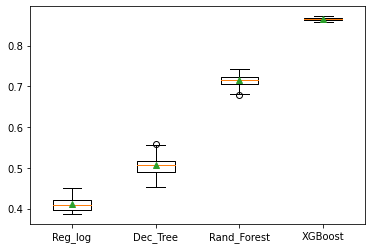

In [161]:
# Visualizar graficamente los modelos evaluados - BOXPLOT

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Se puede observar que 3 de los modelos tienen una capacidad predictiva superior al 50%, siendo el XGBoost el modelo con mayor capacidad predictiva, más de 85%, lo que significa que tiene la capacidad de predecir correctamente más de 85% de las causas de los incendios.

### Modelo final

In [162]:
rf_classifier_final = models['XGBoost'].fit(X_train, y_train)

In [163]:
y_pred = rf_classifier_final.predict(X_test)

In [164]:
def saca_metricas(y1, y2):
    print('Matriz de confusión: ')
    print(multilabel_confusion_matrix(y1, y2, labels=y_test.unique()))
    print('\n Accuracy')
    print(accuracy_score(y1, y2))
    print('\n Precision')
    print(precision_score(y1, y2, average='weighted'))
    print('\n Recall')
    print(recall_score(y1, y2, average='weighted'))
    print('\n f1')
    print(f1_score(y1, y2, average='weighted'))
    '''false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('\n AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)'''  

In [165]:
saca_metricas(y_test, y_pred)

Matriz de confusión: 
[[[  20  485]
  [  39 3349]]

 [[3610   34]
  [ 241    8]]

 [[3824    4]
  [  65    0]]

 [[3725    8]
  [ 160    0]]

 [[3861    1]
  [  27    4]]]

 Accuracy
0.8633444644233239

 Precision
0.7787432455949079

 Recall
0.8633444644233239

 f1
0.8124221978106873


### Curva ROC en caso de clasificación multiclase

In [166]:
# Binarizar la variable target en train y pred 

y_test = label_binarize(y_test, classes=[0,1,2,3,4])
y_pred = label_binarize(y_pred, classes=[0,1,2,3,4])

In [167]:
n_classes = y_test.shape[1]

In [168]:
# Predecir cada clase contra el resto de clases 

classifier = rf_classifier_final
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [174]:
from scipy import interp
from itertools import cycle

In [ ]:
print(__doc__)

In [169]:
# La curva ROC y el AUC (área bajo la curva ROC) para todas las clases de la target CAUSA

fpr = dict()
tpr = dict()
roc_auc = dict()

In [170]:
from sklearn.metrics import auc

In [171]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [172]:
# Compute micro-average ROC curve and ROC area

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [175]:
# Agregar todos los ratio de FALSO POSITIVO
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolar todas las curvas ROC en este punto agregado
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

<ipython-input-175-fa7b1003b32d>:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


In [176]:
# Hacer la media y calcular el AUC

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

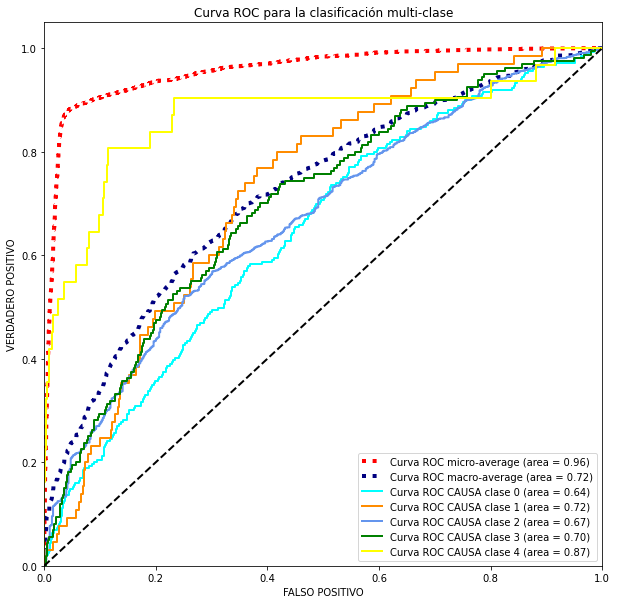

In [177]:
# Las curvas ROC de todas las clases
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='Curva ROC micro-average (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='red', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='Curva ROC macro-average (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','green','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='Curva ROC CAUSA clase {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSO POSITIVO')
plt.ylabel('VERDADERO POSITIVO')
plt.title('Curva ROC para la clasificación multi-clase')
plt.legend(loc="lower right")
plt.show()